# Setup

### Find paths

In [61]:
repo_path = !git rev-parse --show-toplevel
assert (len(repo_path) == 1)

exec_path = repo_path[0] + "/benchmark_queue.exe"

### Run benchmark function

In [71]:
import numpy as np
import json

def run(queue,domains=-1,queues=-1):
    cmd = exec_path + " -queue " + queue + " -num-of-domains " + str(domains) + " -num-of-queues " + str(queues)
    output = !$cmd
    print(cmd)
    print(output)
    time = json.loads(output[0])[10:]
    time_75 = np.quantile(time, 0.75)
    time_50 = np.quantile(time, 0.5)
    time_25 = np.quantile(time, 0.25)
    
    
    return (time_25, time_50, time_75)


### Plotting

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

# Experiment 1: simple workload, skewed

## Data collection

In [74]:
import math

param_space = [2, 4, 8, 12, 16, 24, 32, 48, 64, 92, 120]

lock = []
for i in param_space:
    lock.append(run("LOCK", domains=i))

lf = []
for i in param_space:
    lf.append(run("LF", domains=i))
    
lfm_quart = []
for i in param_space:
    lfm_quart.append(run("LFM", domains=i,queues=math.ceil(i/8)))
    
lfm_half = []
for i in param_space:
    lfm_half.append(run("LFM", domains=i,queues=math.ceil(i/2)))

/home/bm611/ebsl/benchmark_queue.exe -queue LOCK -num-of-domains 2 -num-of-queues -1
['[369,365,369,367,364,365,362,360,358,356,363,361,361,361,362,359,362,356,362,359,362,363,360,362,372,361,363,365,365,354]']
/home/bm611/ebsl/benchmark_queue.exe -queue LOCK -num-of-domains 4 -num-of-queues -1
['[476,473,470,470,472,471,477,469,477,472,477,476,474,472,485,488,483,483,485,483,483,484,480,482,476,478,481,476,482,464]']
/home/bm611/ebsl/benchmark_queue.exe -queue LOCK -num-of-domains 8 -num-of-queues -1
['[1181,1431,1389,1233,1244,1212,1149,1293,1083,985,1141,1001,976,942,937,982,921,906,859,825,826,812,811,813,802,834,660,641,644,612]']
/home/bm611/ebsl/benchmark_queue.exe -queue LOCK -num-of-domains 12 -num-of-queues -1
['[997,1180,1019,972,1116,1326,1453,1407,1345,1401,1314,1284,1310,1326,1259,1166,1240,1293,1266,1213,1307,1259,1265,1242,1121,1237,1094,1113,881,913]']
/home/bm611/ebsl/benchmark_queue.exe -queue LOCK -num-of-domains 16 -num-of-queues -1
['[728,670,766,868,740,743,880,7

/home/bm611/ebsl/benchmark_queue.exe -queue LFM -num-of-domains 92 -num-of-queues 46
['[23,12,12,11,12,13,11,12,13,11,12,12,11,13,12,11,12,12,11,12,12,12,12,12,11,12,12,11,14,12]']
/home/bm611/ebsl/benchmark_queue.exe -queue LFM -num-of-domains 120 -num-of-queues 60
['[25,9,8,10,8,10,8,10,8,9,8,10,8,10,8,10,8,10,8,10,8,10,8,10,8,10,8,15,8,11]']


## Analysis

### Exec time vs number of domains

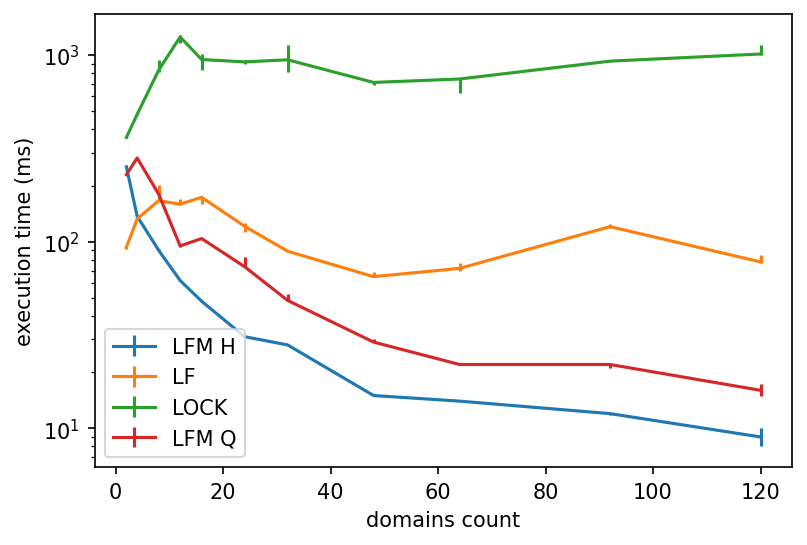

In [77]:
lf = np.array(lf)
lock = np.array(lock)
lfm_half = np.array(lfm_half)
lfm_quart = np.array(lfm_quart)
x = param_space

fig, ax = plt.subplots()

def plot(data):
    err_1 = data[:,2] - data[:,1]
    err_2 = data[:,1] - data[:,0]
    
    return ax.errorbar(x, data[:,1], (err_2, err_1))

plotted = [(plot(lfm_half), "LFM H"),
           (plot(lf),"LF"),
           (plot(lock),"LOCK"),
           (plot(lfm_quart),"LFM Q")]

#line_lfm_quart, = ax.plot(x, lfm_quart[:,1], label='LFM Q')
#line_lock, = ax.plot(x, lock[:,1], label='LOCK')

handles,labels = zip(*plotted)
ax.legend(handles,labels)


plt.yscale('log')
plt.xlabel('domains count')
plt.ylabel('execution time (ms)')
plt.savefig('queues2.png')
plt.show()